# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#empty lists for api data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#setup url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#begin calls 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"{city}")
    except:
        print("NO DATA")

bredasdorp
ushuaia
lasa
grindavik
arraial do cabo
luderitz
severo-kurilsk
dikson
mar del plata
saint-philippe
moree
alofi
bethel
NO DATA
mount isa
nantucket
hermanus
la ronge
hasaki
new norfolk
isangel
puerto ayora
rikitea
los llanos de aridane
barrow
port lincoln
tpig
pljevlja
NO DATA
bogorodskoye
albany
helena
dickinson
miles city
mataura
xining
NO DATA
cairns
NO DATA
antofagasta
vaini
chase
caravelas
kristiansund
saint george
NO DATA
laibin
NO DATA
bac lieu
jamestown
constitucion
nikolskoye
punta arenas
blyth
tarko-sale
NO DATA
lebu
upernavik
kralendijk
capim grosso
imelda
erenhot
bengkulu
kodiak
lorengau
hobart
abyek
oriximina
kibondo
tasiilaq
NO DATA
khatanga
torbay
sana
east london
shar
forbes
NO DATA
NO DATA
NO DATA
mahebourg
saldanha
carmo do paranaiba
biryusinsk
busselton
lima
NO DATA
norman wells
anzio
atuona
mamou
novaya zaimka
igarka
NO DATA
katobu
ostrovnoy
dana point
somerset
bad munstereifel
baruun-urt
pitanga
NO DATA
vanimo
poya
westport
NO DATA
coihaique
corinto
san pa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weatherdf = pd.DataFrame(weather_dict)
weatherdf.to_csv('weatherdf.csv')
weatherdf.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1595190248,93,-34.53,20.04,55.4,1.63
1,Ushuaia,40,AR,1595190189,100,-54.80,-68.30,33.8,6.93
2,Laas,39,IT,1595190311,59,46.62,10.70,64.4,3.36
3,Grindavik,75,IS,1595190147,71,63.84,-22.43,50.0,8.05
4,Arraial do Cabo,0,BR,1595190252,78,-22.97,-42.03,73.4,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

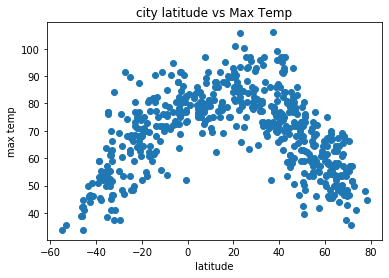

In [23]:
plt.scatter(weatherdf["Lat"], weatherdf["Max Temp"])
plt.title("city latitude vs Max Temp")
plt.xlabel("latitude")
plt.ylabel("max temp")
plt.savefig('latvstemp.pdf')

#### Latitude vs. Humidity Plot

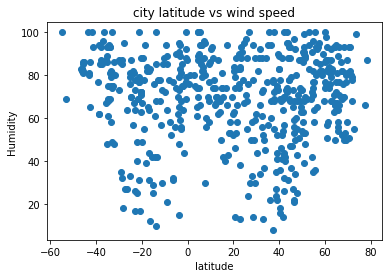

In [24]:
plt.scatter(weatherdf["Lat"], weatherdf["Humidity"])
plt.title("city latitude vs wind speed")
plt.xlabel("latitude")
plt.ylabel("Humidity")
plt.savefig('latvshumidity.pdf')

#### Latitude vs. Cloudiness Plot

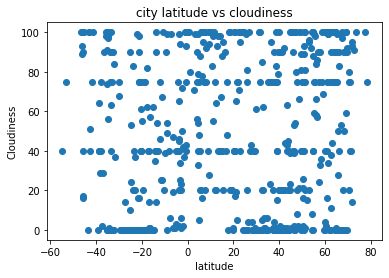

In [25]:
plt.scatter(weatherdf["Lat"], weatherdf["Cloudiness"])
plt.title("city latitude vs cloudiness")
plt.xlabel("latitude")
plt.ylabel("Cloudiness")
plt.savefig('latvsclouds.png')

#### Latitude vs. Wind Speed Plot

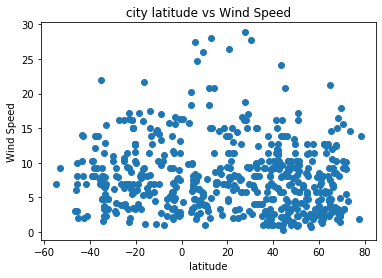

In [27]:
plt.scatter(weatherdf["Lat"], weatherdf["Wind Speed"])
plt.title("city latitude vs Wind Speed")
plt.xlabel("latitude")
plt.ylabel("Wind Speed")
plt.savefig('latvswind.png')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


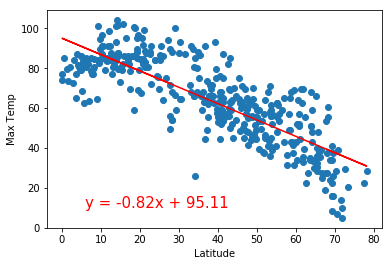

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


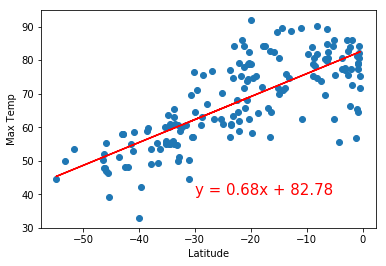

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


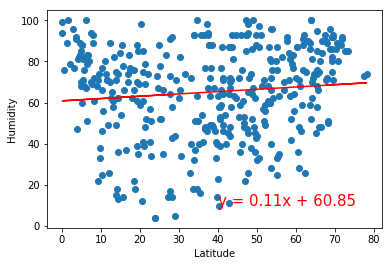

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


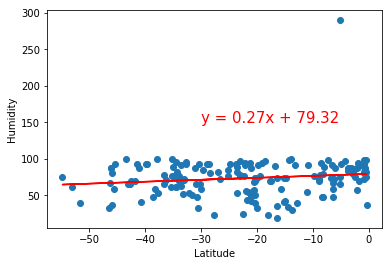

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


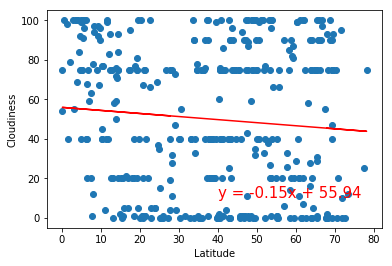

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


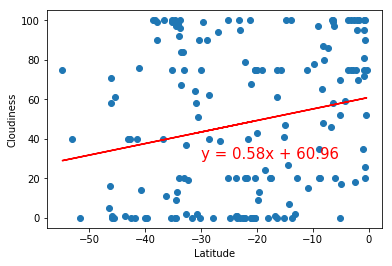

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


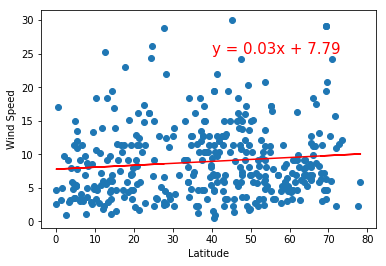

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


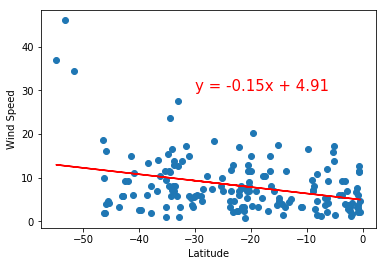